## Leitura do Grafo

In [32]:
def read_graph(file_path):
    adjacency_matrix = []
    adjacency_list = {}
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        lines.pop(0)
        for i in range(len(lines)):
            lines[i] = lines[i].split()
            lines[i] = [int(x) for x in lines[i]]
        for line in lines:
            adjacency_matrix.append(line)
        for i in range(len(adjacency_matrix)):
            adjacency_list[i] = []
            for j in range(len(adjacency_matrix[i])):
                if adjacency_matrix[i][j] == 1:
                    adjacency_list[i].append(j)
                    
    return adjacency_matrix, adjacency_list

def get_arestas(lista_adj):
    arestas = []
    for vertex1, neighbors in lista_adj.items():
        for vertex2 in neighbors:
            arestas.append((vertex1, vertex2))
    return arestas


In [33]:

adjacency_matrix, adjacency_list = read_graph('grafo.txt')
lista_arestas = get_arestas(adjacency_list)
print("Adjacency Matrix:")
for row in adjacency_matrix:
    print(row)
print("Adjacency List:")
for vertex, neighbors in adjacency_list.items():
    print(f"{vertex}: {neighbors}")
print("Lista de arestas: \n", lista_arestas)


Adjacency Matrix:
[0, 1, 1, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1]
[0, 0, 1, 0, 1, 0, 1]
[0, 0, 0, 0, 1, 1, 0]
Adjacency List:
0: [1, 2, 3]
1: [0, 2, 3]
2: [0, 1, 3, 4, 5]
3: [0, 1, 2]
4: [2, 5, 6]
5: [2, 4, 6]
6: [4, 5]
Lista de arestas: 
 [(0, 1), (0, 2), (0, 3), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (4, 2), (4, 5), (4, 6), (5, 2), (5, 4), (5, 6), (6, 4), (6, 5)]


## Fusão de Vertices

In [34]:
def fusion_vertex(adjacency_list, vertex1, vertex2):
    adjacency_list[vertex1].extend(adjacency_list[vertex2])
    adjacency_list.pop(vertex2)
    while vertex2 in adjacency_list[vertex1]:
        adjacency_list[vertex1].remove(vertex2)
    while vertex1 in adjacency_list[vertex1]:
        adjacency_list[vertex1].remove(vertex1)

    for vertex in adjacency_list:
        for neighbor in adjacency_list[vertex]:
            if neighbor == vertex2:
                adjacency_list[vertex][adjacency_list[vertex].index(neighbor)] = vertex1
    
    return adjacency_list
    

## Algoritmo de Karger

In [35]:
import random
def karger(adjacency_list, edges):
    while len(adjacency_list) > 1:
        edges = get_arestas(adjacency_list)
        vertex1, vertex2 = random.choice(edges)
        
        # Check if vertex1 is already a neighbor of vertex2
        if vertex1 in adjacency_list[vertex2]:
            # Call the fusion_vertex function
            adjacency_list = fusion_vertex(adjacency_list, vertex1, vertex2)

    num_edges = len(edges) 
    num_edges = num_edges / 2 
    return num_edges
    

In [36]:
print(karger(adjacency_list, lista_arestas))

2.0


## Algoritmo Ingênuo

In [37]:
import numpy as np

def ingenuo(lista_adj, arestas):
    vertices = list(lista_adj.keys())
    grupo1 = []
    
    tam_grupo = np.random.randint(1,len(vertices)-1)
    
    for i in range(tam_grupo):
        x = np.random.randint(len(vertices))
        grupo1.append(vertices[x])
        vertices.pop(x)

    solucao = []
    grupo2 = vertices
    for i in range(len(arestas)):
        if ((arestas[i][0] in grupo1) and (arestas[i][1] not in grupo1)) or ((arestas[i][1] in grupo1) and (arestas[i][0] not in grupo1)):
            if (arestas[i][0], arestas[i][1]) not in solucao and (arestas[i][1], arestas[i][0]) not in solucao:
                solucao.append(arestas[i])
                # print("esse aqui é o grupo de vertices 1:",grupo1)
                # print("esse aqui é o grupo de vertices 2:",grupo2)
                # print("essa é a solução: ",ingenuo(solucao))
    return len(solucao)


In [38]:
adjacency_matrix, adjacency_list = read_graph('grafo.txt')
print(ingenuo(adjacency_list, lista_arestas))

3


## Dicionario de probablidades

In [39]:
def get_prob_n_iter(n_iter, algoritmo, adjacency_list, arestas,nome_arquivo):
    count_dict = {}
    for j in range (100):
        min_return = float('inf') # Initialize with a large value
        for i in range(n_iter):
            adjacency_matrix, adjacency_list = read_graph(nome_arquivo)
            return_value = algoritmo(adjacency_list, arestas)
            if return_value < min_return:
                min_return = return_value
        if min_return not in count_dict:
            count_dict[min_return] = 1
        else:
            count_dict[min_return] += 1

    return count_dict

In [40]:
n_iterr = 20
print("Karger: ", get_prob_n_iter(n_iterr, karger, adjacency_list, lista_arestas,'graph_type2_3.txt'))
print("Ingenuo: ", get_prob_n_iter(n_iterr, ingenuo, adjacency_list, lista_arestas,'graph_type1_1.txt'))

Karger:  {9.0: 96, 10.0: 4}
Ingenuo:  {0: 63, 2: 24, 3: 13}


# Curvas de probabilidade

### Dados para as curvas

In [41]:
# Dados para as curvas
corte_min = 2
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'grafo.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'grafo.txt')
    
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])

print(lista_karger)
print(lista_ingenuo)


iter:  1
Karger: 40
ingenuo: 7
iter:  2
Karger: 55
ingenuo: 9
iter:  3
Karger: 70
ingenuo: 7
iter:  4
Karger: 84
ingenuo: 14
iter:  5
Karger: 94
ingenuo: 24
iter:  6
Karger: 99
ingenuo: 23
iter:  7
Karger: 97
ingenuo: 31
iter:  8
Karger: 97
ingenuo: 34
iter:  9
Karger: 97
ingenuo: 32
iter:  10
Karger: 100
ingenuo: 36
iter:  11
Karger: 100
ingenuo: 33
iter:  12
Karger: 100
ingenuo: 45
iter:  13
Karger: 100
ingenuo: 40
iter:  14
Karger: 100
ingenuo: 37
iter:  15
Karger: 100
ingenuo: 44
iter:  16
Karger: 100
ingenuo: 47
iter:  17
Karger: 100
ingenuo: 62
iter:  18
Karger: 100
ingenuo: 55
iter:  19
Karger: 100
ingenuo: 54
iter:  20
Karger: 100
ingenuo: 53
[40, 55, 70, 84, 94, 99, 97, 97, 97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[7, 9, 7, 14, 24, 23, 31, 34, 32, 36, 33, 45, 40, 37, 44, 47, 62, 55, 54, 53]


### Plot do grafico

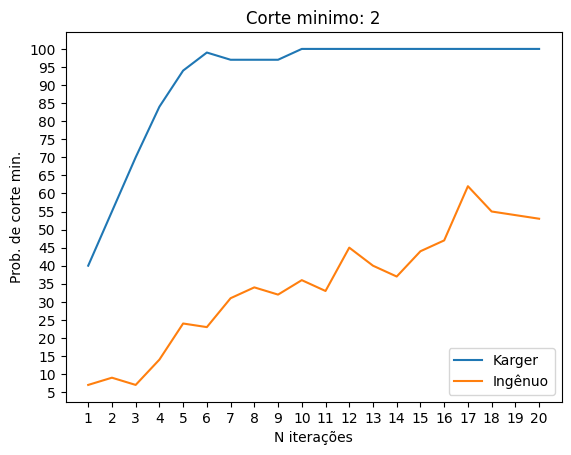

In [42]:
import matplotlib.pyplot as plt

# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


In [43]:
# Dados para as curvas
corte_min = 1
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type1_1.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type1_1.txt')
    if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


KeyError: 1

iter:  1
Karger: 53
ingenuo: 6
iter:  2
Karger: 64
ingenuo: 7
iter:  3
Karger: 80
ingenuo: 13
iter:  4
Karger: 86
ingenuo: 11
iter:  5
Karger: 95
ingenuo: 7
iter:  6
Karger: 100
ingenuo: 7
iter:  7
Karger: 100
ingenuo: 12
iter:  8
Karger: 100
ingenuo: 16
iter:  9
Karger: 100
ingenuo: 15
iter:  10
Karger: 100
ingenuo: 9
iter:  11
Karger: 100
ingenuo: 8
iter:  12
Karger: 100
ingenuo: 5
iter:  13
Karger: 100
ingenuo: 8
iter:  14
Karger: 100
ingenuo: 9
iter:  15
Karger: 100
ingenuo: 5
iter:  16
Karger: 100
ingenuo: 6
iter:  17
Karger: 100
ingenuo: 5
iter:  18
Karger: 100
ingenuo: 5
iter:  19
Karger: 100
ingenuo: 5
iter:  20
Karger: 100
ingenuo: 5


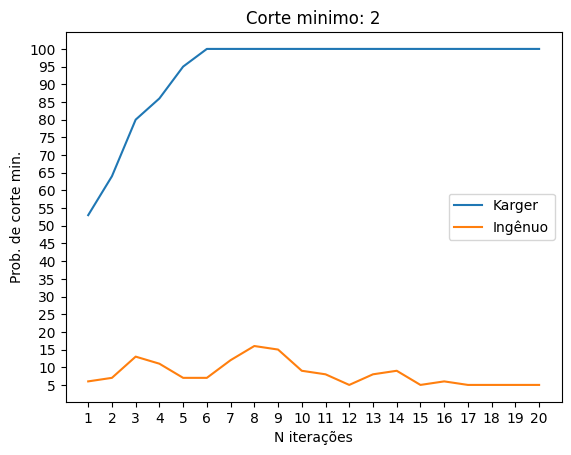

In [ ]:
# Dados para as curvas
corte_min = 2
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type1_2.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type1_2.txt')
    if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


iter:  1
Karger: 72
ingenuo: 7
iter:  2
Karger: 90
ingenuo: 7
iter:  3
Karger: 98
ingenuo: 13
iter:  4
Karger: 100
ingenuo: 16
iter:  5
Karger: 100
ingenuo: 12
iter:  6
Karger: 100
ingenuo: 12
iter:  7
Karger: 100
ingenuo: 11
iter:  8
Karger: 100
ingenuo: 9
iter:  9
Karger: 100
ingenuo: 8
iter:  10
Karger: 100
ingenuo: 4
iter:  11
Karger: 100
ingenuo: 5
iter:  12
Karger: 100
ingenuo: 6
iter:  13
Karger: 100
ingenuo: 1
iter:  14
Karger: 100
ingenuo: 3
iter:  15
Karger: 100
ingenuo: 2
iter:  16
Karger: 100
ingenuo: 2
iter:  17
Karger: 100
ingenuo: 1
iter:  18
Karger: 100
ingenuo: 2
iter:  19
Karger: 100
ingenuo: 2
iter:  20
Karger: 100
ingenuo: 2


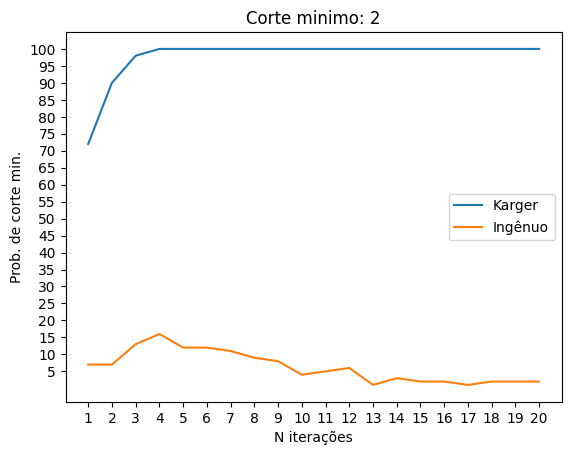

In [ ]:
# Dados para as curvas
corte_min = 2
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type1_3.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type1_3.txt')
    if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


In [ ]:
# Dados para as curvas
corte_min = 1
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type2_1.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type2_1.txt')
    if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


iter:  1
Karger: 26
ingenuo: 5
iter:  2
Karger: 15
ingenuo: 8
iter:  3
Karger: 2
ingenuo: 10
iter:  4
Karger: 1
ingenuo: 16
iter:  5


KeyError: 2

In [44]:
# Dados para as curvas
corte_min = 5
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type2_2.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type2_2.txt')
    if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


iter:  1
Karger: 9
ingenuo: 11
iter:  2
Karger: 20
ingenuo: 16
iter:  3
Karger: 31
ingenuo: 8
iter:  4
Karger: 25
ingenuo: 8
iter:  5
Karger: 37
ingenuo: 3
iter:  6
Karger: 56
ingenuo: 1
iter:  7
Karger: 55
ingenuo: 2
iter:  8
Karger: 55
ingenuo: 1
iter:  9
Karger: 62
ingenuo: 1
iter:  10
Karger: 64


KeyError: 5

In [45]:
# Dados para as curvas
corte_min = 9
n_iter = 20

# criando a lista
lista_karger = []
lista_ingenuo = []
for i in range(1, n_iter+1):
    print("iter: ", i)
    prob_karger = get_prob_n_iter(i, karger, adjacency_list, lista_arestas,'graph_type2_3.txt')
    prob_ingenuo = get_prob_n_iter(i, ingenuo, adjacency_list, lista_arestas,'graph_type2_3.txt')
        if corte_min not in prob_karger:
        prob_karger[corte_min] = 0
    if corte_min not in prob_ingenuo:
        prob_ingenuo[corte_min] = 0
    print(f"Karger: {prob_karger[corte_min]}")
    print(f"ingenuo: {prob_ingenuo[corte_min]}")

    lista_karger.append(prob_karger[corte_min])
    lista_ingenuo.append(prob_ingenuo[corte_min])
# Dados das lista
y1 = lista_karger
y2 = lista_ingenuo
x = [i for i in range(1, n_iter+1)]

# Plotagem das curvas
plt.plot(x, y1, label='Karger')
plt.plot(x, y2, label='Ingênuo')

plt.xticks(range(1, n_iter+1, 1))
plt.yticks(range(5, 105, 5))

# Adicionando rótulos aos eixos
plt.xlabel('N iterações')
plt.ylabel('Prob. de corte min.')

# Adicionando uma legenda
plt.legend()
plt.title(f'Corte minimo: {corte_min}')

# Exibindo o gráfico
plt.show()


iter:  1
Karger: 19


KeyError: 9